<a href="https://colab.research.google.com/github/charann90/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Prediction

# Problem statement

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

**Data description**

*Date : year-month-day*

*Rented Bike count - Count of bikes rented at each hour*

*Hour - Hour of he day*

*Temperature-Temperature in Celsius*

*Humidity - %*

*Windspeed - m/s*

*Visibility - 10m*

*Dew point temperature - Celsius*

*Solar radiation - MJ/m2*

*Rainfall - mm*

*Snowfall - cm*

*Seasons - Winter, Spring, Summer, Autumn*

*Holiday - Holiday/No holiday*

*Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)*



# libraries

In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

# Data uploading

In [42]:
df=pd.read_csv('/content/SeoulBikeData.csv',encoding= 'unicode_escape')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [43]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [44]:
#understanding the statistical information
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data cleaning

In [45]:
#checking null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values present

In [46]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [47]:
#sns.distplot(df['Rainfall(mm)'])

In [48]:
#df.plot.scatter(x='Rainfall(mm)',y='Rented Bike Count')

In [49]:
#df.plot.scatter(x='Rainfall(mm)',y='Rented Bike Count')

In [50]:
#creating seperating columns for yaer and month
df['month']=pd.DatetimeIndex(df['Date']).month
df['year']=pd.DatetimeIndex(df['Date']).year

In [51]:
#dropping date column
df.drop('Date',axis=1,inplace=True)

In [52]:
#listing all the categorical columns
categorical_col=['Seasons','Holiday','Functioning Day']

**Seasons**

In [53]:
#creating a variable for grouping rented bike count with the season bookings
season_count=pd.DataFrame(df.groupby(['Seasons'])['Rented Bike Count'].sum())
season_count.rename({'index':'season','Seasons':'total bike rent'})

,Rented Bike Count
Seasons,
Autumn,1790002
Spring,1611909
Summer,2283234
Winter,487169


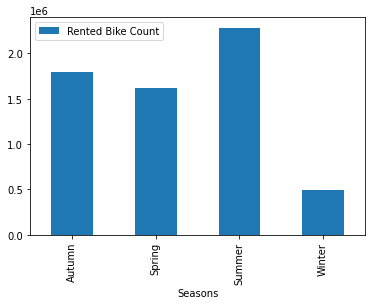

In [54]:
#plotting the sum of rentals in different seasons
season_count.plot(kind='bar')

*   The use rental bikes is high in summer and low in winter

**Funtioning day**

In [55]:
#creating a variable for grouping rented bike count with the funtioning day bookings
workingday_count=pd.DataFrame(df.groupby(['Functioning Day'])['Rented Bike Count'].sum())
workingday_count.rename({'index':'functioning day','Seasons':'total bike rent'})

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


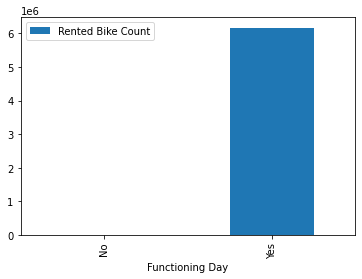

In [56]:
#plotting the above dataframe 
workingday_count.plot(kind='bar')

*   There are no renting bikes during non functioning days and hence there is extremely low demand during non working days

**Holiday rental**

In [57]:
#creating a variable for grouping rented bike count with the funtioning day bookings
holiday_count=pd.DataFrame(df.groupby(['Holiday'])['Rented Bike Count'].sum())
holiday_count.rename({'index':'holiday','Seasons':'total bike rent'})

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


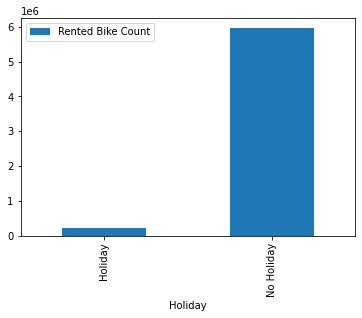

In [58]:
#plotting the sum of rentals during holidays and non holidays
holiday_count.plot(kind='bar')

*   The use of rental bikes is extremely low when there is a holiday


In [59]:
#creatinhg a function to plot the frequency distributions of categorical columns
'''def category(col):
  for i in categorical_col:
    plt.figure(figsize=(10,5))
    df[i].value_counts().head(10).plot(kind='bar')  
    plt.title(f'{i}') 
    plt.show()'''

"def category(col):\n  for i in categorical_col:\n    plt.figure(figsize=(10,5))\n    df[i].value_counts().head(10).plot(kind='bar')  \n    plt.title(f'{i}') \n    plt.show()"

**Yearly bookings**

In [60]:
#rental per year
year_sales=df.groupby(['year'])['Rented Bike Count'].sum()
year_sales

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

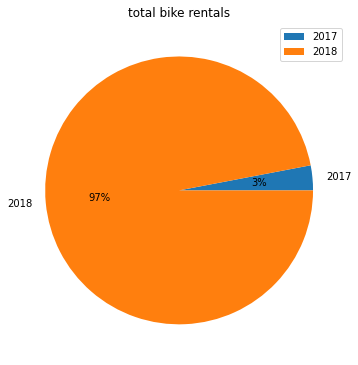

In [61]:
#plotting the yearly sales in pie plot
plt.figure(figsize=(6,7))
plt.pie(year_sales,labels=['2017','2018'],autopct='%1.0f%%')
plt.title('total bike rentals')
plt.legend()
plt.show()


*   The are very low bike rentals in 2017 compared to 2018 

*   2018 bike rentals constitutes 97% of the total rentals



**Rentals per month**

In [62]:
#sales for different months
month_sales=pd.DataFrame(df.groupby(['month','year'])['Rented Bike Count'].sum().sort_values(ascending=False)).reset_index()
month_sales

,month,year,Rented Bike Count
0,6,2018,700059
1,7,2018,682790
2,5,2018,657641
3,10,2018,623535
4,8,2018,606158
5,4,2018,547490
6,9,2018,492093
7,11,2018,487564
8,3,2018,447815
9,1,2018,277705


In [63]:
#defining seperate varible for both the years
year1= pd.DataFrame(month_sales[month_sales['year']==2017])
year2= pd.DataFrame(month_sales[month_sales['year']==2018])

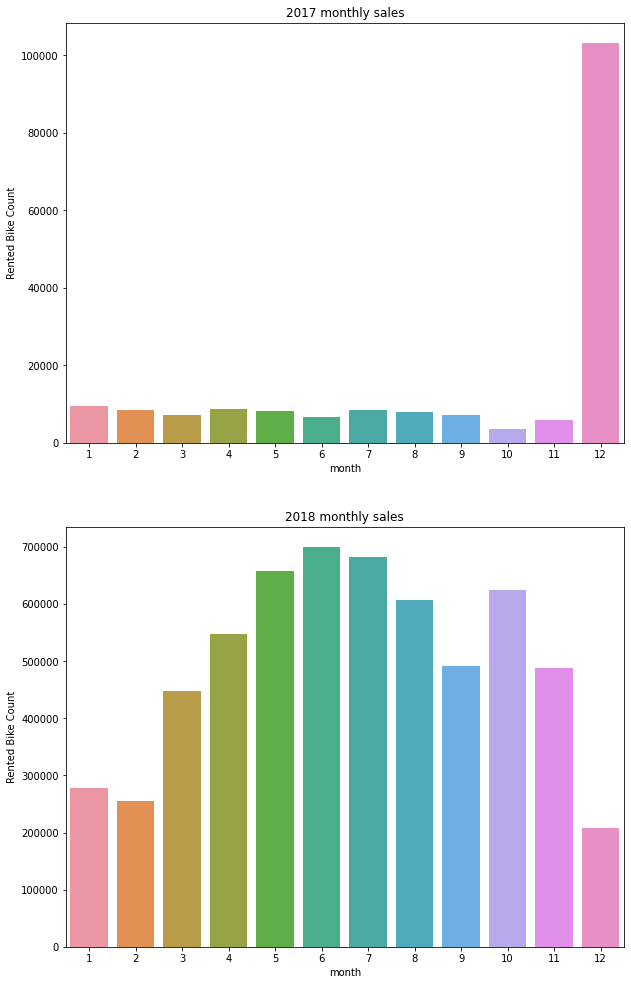

In [64]:
#plotting monthly rentals for both the years 
fig= plt.figure(figsize=(10,17))
axs=fig.add_subplot(2,1,1)
sns.barplot(data=year1,x='month',y='Rented Bike Count',ax=axs)
plt.title('2017 monthly sales')

axs=fig.add_subplot(2,1,2)
sns.barplot(data=year2,x='month',y='Rented Bike Count',ax=axs)
plt.title('2018 monthly sales')

plt.show()



* In 2017 december month has highest bike rentals 


* In 2018 june month has highest bike rentals and december has least rentals



In [65]:
#sales in different hours
hour_sales=pd.DataFrame(df.groupby(['Hour'])['Rented Bike Count'].sum().sort_values(ascending=False))
hour_sales.head()

,Rented Bike Count
Hour,
18,548568
19,436229
17,415556
20,390172
21,376479


In [66]:
'''def part_of_day(col):
 for i in df[col]:
    if i>0 and i<=12:
     i="morning"
    elif i>12 and i<=17:
     i='afternoon'
    else:
     i>17 and i<=24
     i='evening'
    return i'''

'def part_of_day(col):\n for i in df[col]:\n    if i>0 and i<=12:\n     i="morning"\n    elif i>12 and i<=17:\n     i=\'afternoon\'\n    else:\n     i>17 and i<=24\n     i=\'evening\'\n    return i'

In [67]:
#df['Hour']=df['Hour'].apply(part_of_day)

In [68]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018


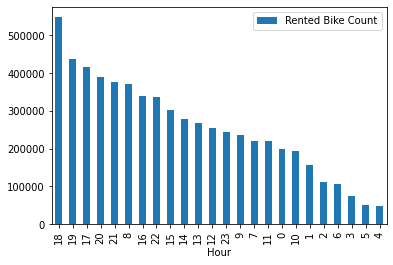

In [69]:
hour_sales.plot(kind='bar')



*   After 6 pm there is huge demand for bike rentals 




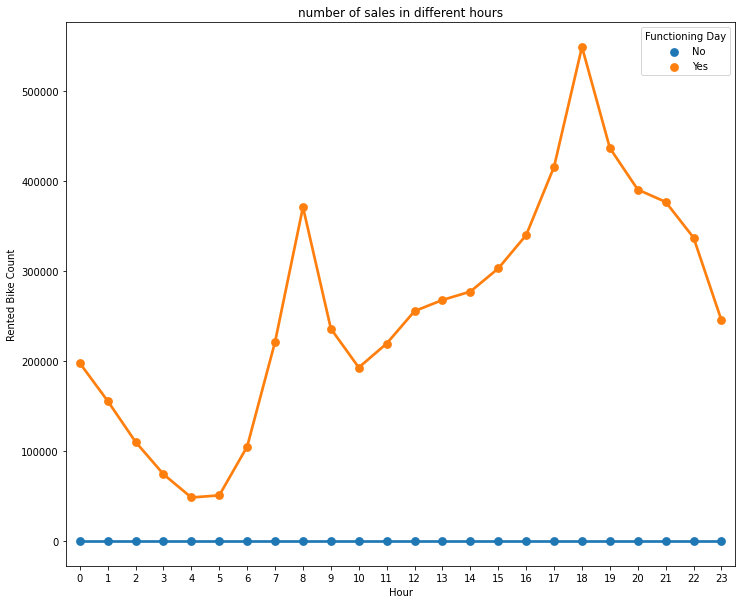

In [70]:
#plotting sales in diffrent hours for functioning day
fig= plt.figure(figsize=(12,10))
group_work_hour = pd.DataFrame(df.groupby(['Functioning Day', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.pointplot(data=group_work_hour,x='Hour',y='Rented Bike Count',hue='Functioning Day')
plt.title('number of sales in different hours')
plt.show()

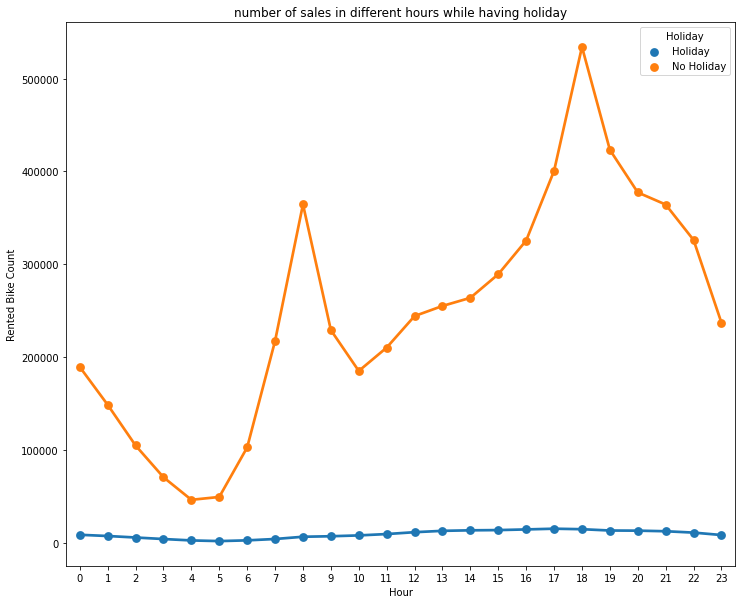

In [71]:
#plotting sales in diffrent hours in holidays 
fig= plt.figure(figsize=(12,10))
group_work_hour = pd.DataFrame(df.groupby(['Holiday', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.pointplot(data=group_work_hour,x='Hour',y='Rented Bike Count',hue='Holiday')
plt.title('number of sales in different hours while having holiday')
plt.show()

**Looking for outliers**

In [72]:
#listing all the numerical columns
num_col=['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

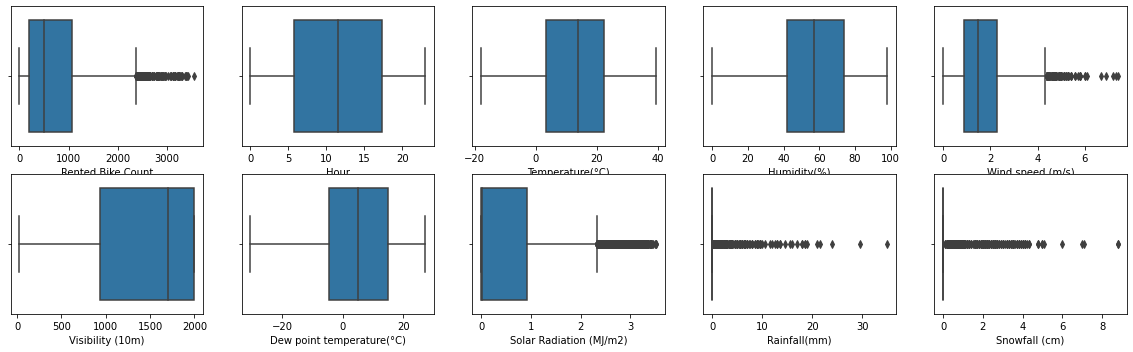

In [73]:
#looking for outliers
plt.figure(figsize=(20,18))
for index, i in enumerate(num_col):
  plt.subplot(6,5,index+1)
  sns.boxplot(data=df,x=i)

*We see outliers in five features so dealing with the outliers is necessary to get the most accurate prediction.

*Deleteting the features rainfall and snowfall which has maximum outliers to preventing affecting the functionality of the prediction.
*Replacing the outlier values by nearest quantile values to reduce outliers

In [74]:
#Replacing the outlier values by nearest quantile values to reduce outliers
max_val = df['Wind speed (m/s)'].quantile(0.95)
df['Wind speed (m/s)'] = np.where(df['Wind speed (m/s)']>max_val,max_val,df['Wind speed (m/s)'])

max_val = df['Solar Radiation (MJ/m2)'].quantile(0.95)
df['Solar Radiation (MJ/m2)'] = np.where(df['Solar Radiation (MJ/m2)']>max_val,max_val,df['Solar Radiation (MJ/m2)'])

max_val = df['Rented Bike Count'].quantile(0.95)
df['Rented Bike Count'] = np.where(df['Rented Bike Count']>max_val,max_val,df['Rented Bike Count'])


In [75]:
#dropping columns rainfall and snowfall as it has maximum outliers
df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

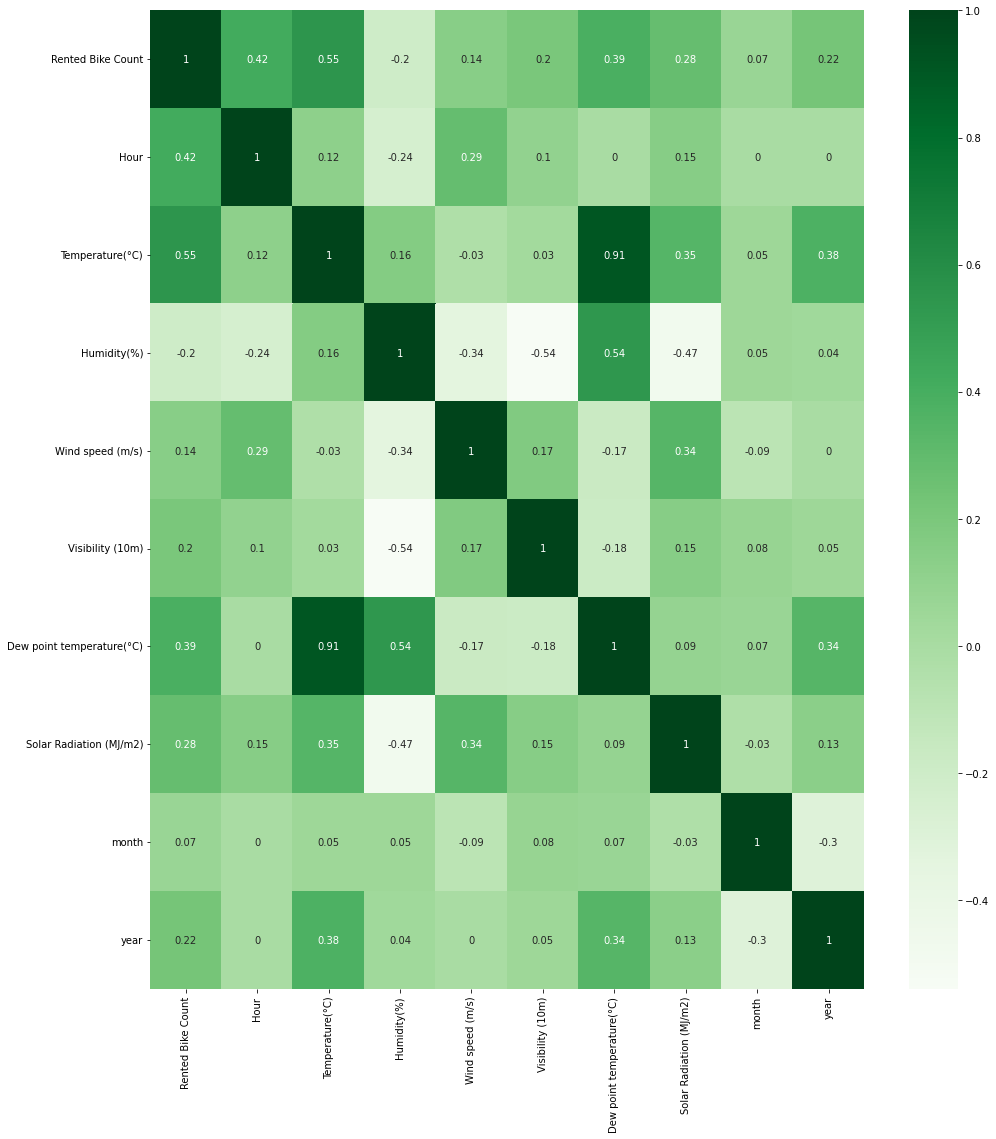

In [76]:
#plotting heat map to find out strengnth between the variables
plt.figure(figsize=(16,18))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)



*   Here we have multicollinearity between the features Temperature and dew temperature which is highly corelated by 0.91 which weakens the statistical power of our model. So we need to drop a column to reduce multicollinearity.




In [77]:
#dropping dew point temperature to reduce multicollinearity
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

In [78]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [79]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.437219
1,Temperature(°C),3.281689
2,Humidity(%),22.368091
3,Wind speed (m/s),5.347163
4,Visibility (10m),10.389264
5,Solar Radiation (MJ/m2),2.788620
6,month,4.701255
7,year,55.447660


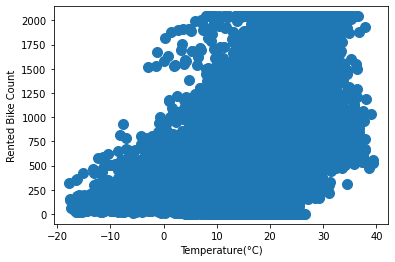

In [80]:
#plotting the scatter plot to the value flow 
df.plot.scatter(x='Temperature(°C)',y='Rented Bike Count',s=100)

In [81]:
from sklearn.preprocessing import LabelEncoder


In [82]:
#creating a variable of all the categorical features
categorical_col=['Seasons','Holiday','Functioning Day']

In [83]:
#encoding all the categorical features with dummies
df = pd.get_dummies(df, columns = categorical_col)

In [84]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),month,year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254.0,0,-5.2,37,2.2,2000,0.0,1,2017,0,0,0,1,0,1,0,1
1,204.0,1,-5.5,38,0.8,2000,0.0,1,2017,0,0,0,1,0,1,0,1
2,173.0,2,-6.0,39,1.0,2000,0.0,1,2017,0,0,0,1,0,1,0,1
3,107.0,3,-6.2,40,0.9,2000,0.0,1,2017,0,0,0,1,0,1,0,1
4,78.0,4,-6.0,36,2.3,2000,0.0,1,2017,0,0,0,1,0,1,0,1


In [85]:
#defining a numerical feature column 
numeric_features=df.drop(['Rented Bike Count'],axis=1).columns.tolist()

In [86]:
numeric_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'month',
 'year',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_Holiday',
 'Holiday_No Holiday',
 'Functioning Day_No',
 'Functioning Day_Yes']

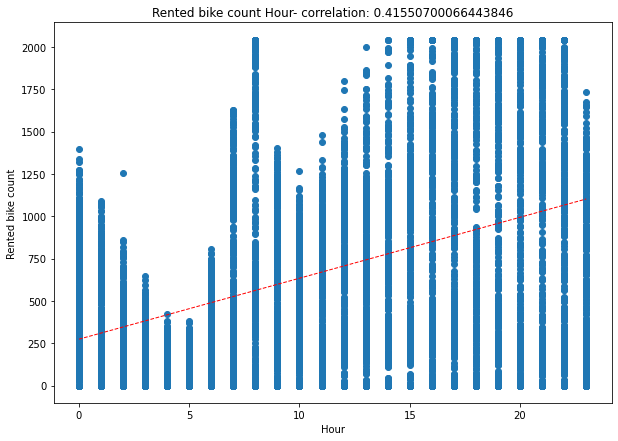

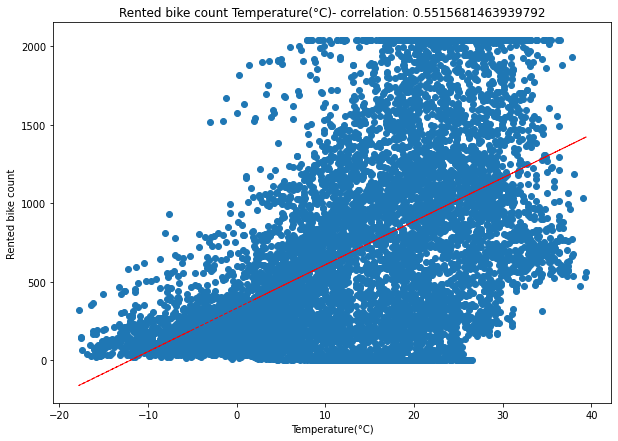

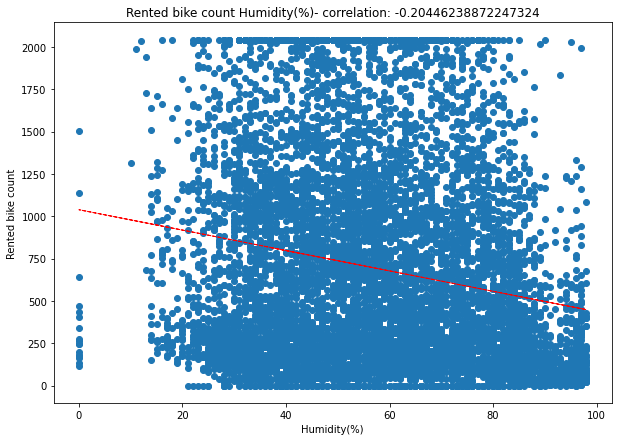

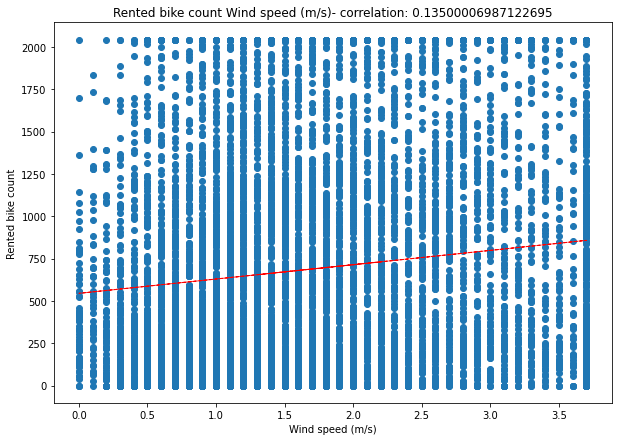

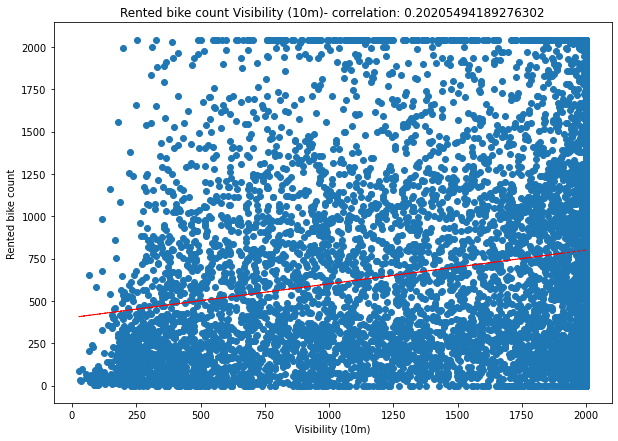

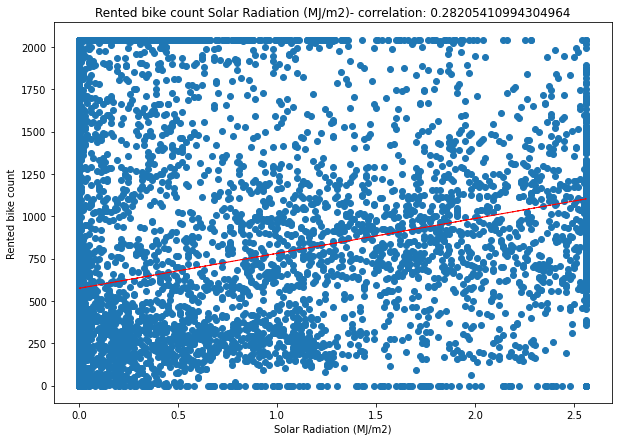

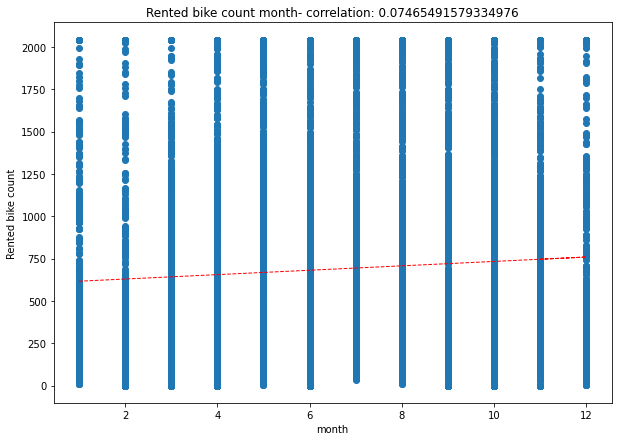

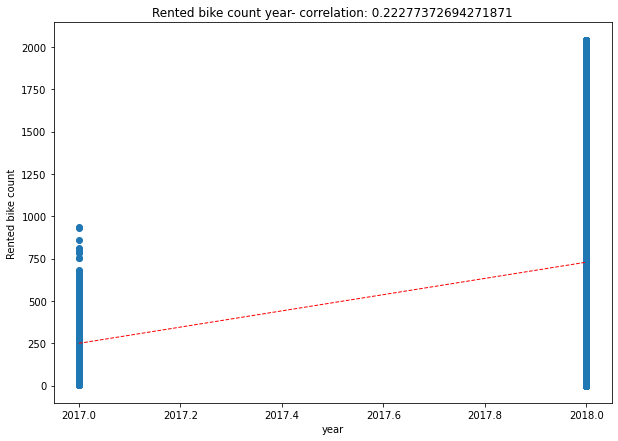

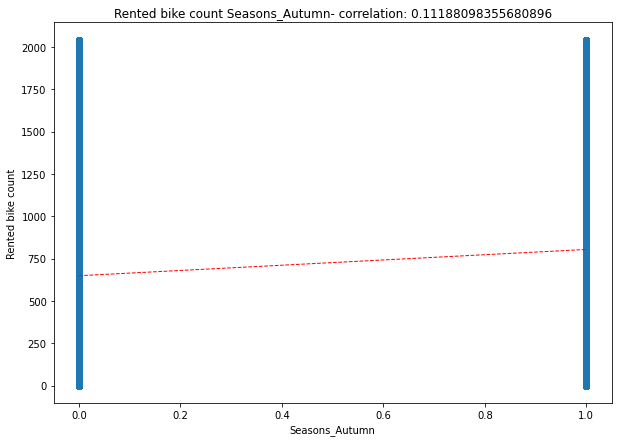

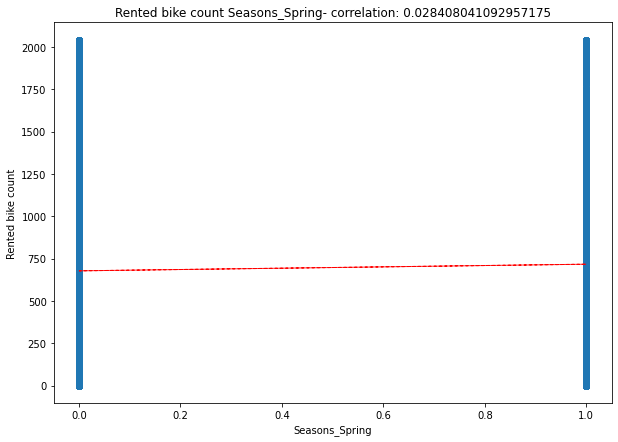

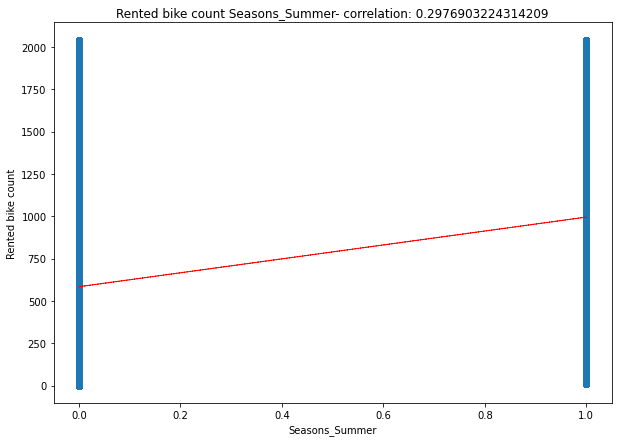

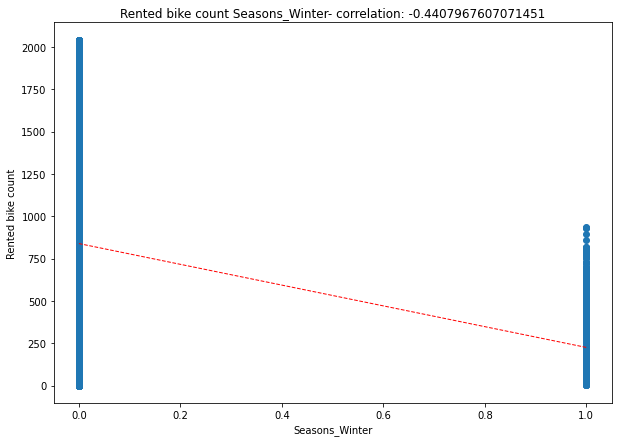

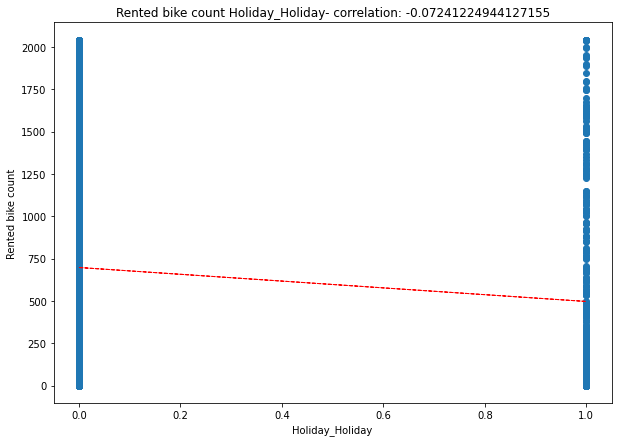

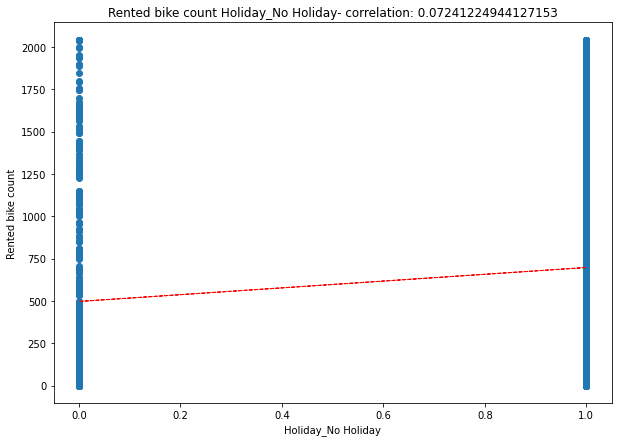

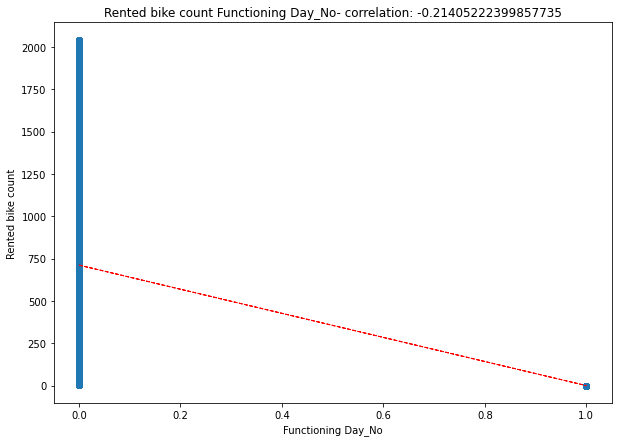

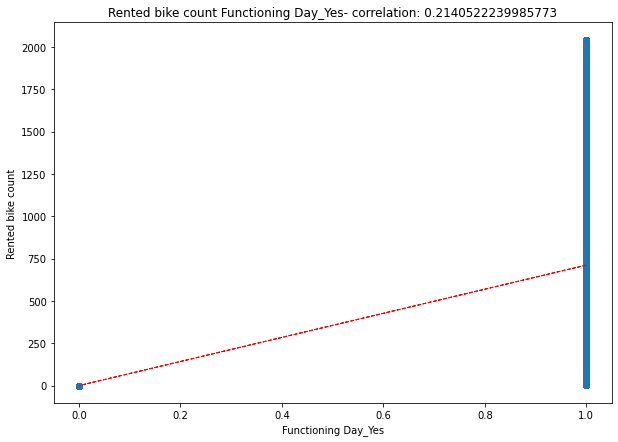

In [87]:
#creating correation plot for rented bike count with all the features
for col in numeric_features:
  fig=plt.figure(figsize=(10,7))
  ax = fig.gca()
  feature=df[col]
  label=df['Rented Bike Count']
  relation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('Rented bike count')
  ax.set_title('Rented bike count ' + col + '- correlation: ' + str(relation))
  z = np.polyfit(feature, label, 1)
  y_hat = np.poly1d(z)(feature)
  plt.plot(feature, y_hat, "r--", lw=1)

plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


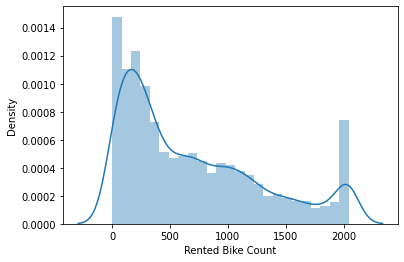

In [88]:
#plotting distplot of rented bike count to see its distribution
sns.distplot(df['Rented Bike Count'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


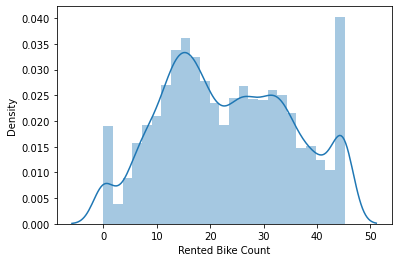

In [89]:
#applying square root to change it to normal distribution 
sns.distplot(np.sqrt(df['Rented Bike Count']))

# Machine learning

In [90]:
#defing data for test train
x=df.drop(['Rented Bike Count'],axis=1)
y=df['Rented Bike Count']

In [91]:
from sklearn.preprocessing import StandardScaler


In [92]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#scaling
scalar=StandardScaler()
scale=scalar.fit(x_train)
x_train=scale.transform(x_train)
x_test=scale.transform(x_test)


In [93]:
from sklearn.model_selection import cross_val_score


# Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
#defing varible for linear regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [96]:
print('coefficient:',model.coef_)
print('intercept:',model.intercept_)

coefficient: [ 1.78971934e+02  2.90650177e+02 -1.61785754e+02  1.72628211e+01
  1.07988444e+01 -5.63536087e+01  5.60349019e+00 -2.43658440e+01
 -3.13804339e+13 -3.15980425e+13 -3.13863964e+13 -3.11258785e+13
  2.81236914e+15  2.81236914e+15  6.12325593e+13  6.12325593e+13]
intercept: 687.2624407299913


In [97]:
#predicting values from the test set
y_pred=model.predict(x_test)

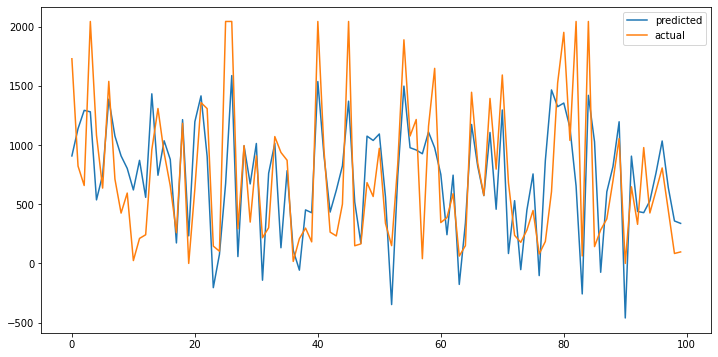

In [98]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [99]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [100]:
#function to find adjusted r2
def adj_r2(x,y):
  r2=r2_score(x,y)
  n=x_test.shape[0]
  p=x_test.shape[1]
  adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [101]:
print('R2 score:',r2_score(y_test,y_pred))
print('Adjusted R2 score:',adj_r2(y_test,y_pred))

R2 score: 0.5485336523036
Adjusted R2 score: 0.5443702738810394


# Hyper parameter tuning and cross validation for linear regression using Lasso and Ridge regularization 

# Lasso Regression

Finding the best parameter alpha from cross validation

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV,RidgeCV
#from sklearn.model_selection import Ridge
import warnings
warnings.filterwarnings('ignore')

In [103]:
#defining a variable for lasso model
lasso=LassoCV(alphas=None,cv=5,max_iter=20000,normalize=True)
lasso.fit(x_train,y_train)

LassoCV(cv=5, max_iter=20000, normalize=True)

In [104]:
#getting the best value alpha after cross validation
lasso.alpha_

0.003936767963427756

Fitting the model again after getting the best parameters

In [105]:
#fitting the train and test data
lasso=Lasso(alpha=0.00413)
lasso.fit(x_train,y_train)

#predicting value from the model
y_pred=lasso.predict(x_test)

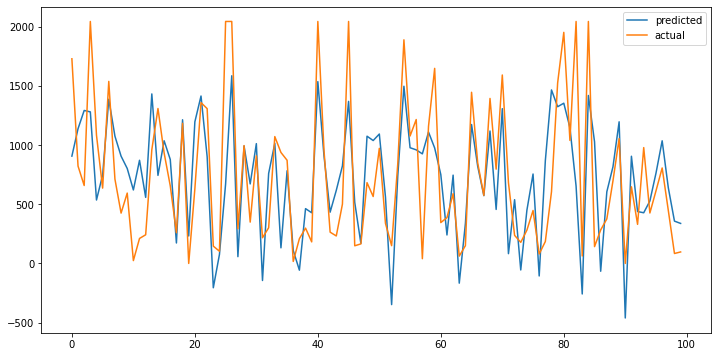

In [106]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [107]:
#printing the r2 and adjusted r2 values
print('R2 score:',r2_score(y_test,y_pred))
print('Adjusted R2 score:',adj_r2(y_test,y_pred))

R2 score: 0.5486464358734104
Adjusted R2 score: 0.5444840975298799


In [108]:
#best score from cross validation
scores=cross_val_score(lasso,x_train,y_train,cv=5)
print('cross validation score=',np.mean(scores))

cross validation score= 0.5699163627843786


# Ridge regression

Finding the best alpha parameter by cross validating ridge regression

In [109]:
#defing the variable for ridgecv model
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50),cv=5,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.77302789, 7.29515634, 8.40934132, 2.95095305, 4.5232608 ,
       8.566035  , 1.45575698, 6.74634022, 8.9962068 , 9.70167987,
       3.19187602, 0.73453099, 8.42790473, 3.09947743, 5.03109197,
       3.12990666, 1.22534291, 0.13289588, 7.98888875, 6.79348618,
       8.02374374, 6.21437153, 7.55426134, 3.8728918 , 8.75126499,
       7.6688404 , 3.10223525, 7.63423592, 5.60743321, 5.14757659,
       7.19190736, 4.00068385, 8.98062643, 9.51755798, 2.01041952,
       8.0073463 , 8.18893509, 7.94779132, 6.21318997, 7.85775392,
       0.90204272, 3.59470058, 5.75121335, 2.6360824 , 1.31013438,
       4.5920826 , 8.57264596, 7.66979159, 2.40692798, 0.39255476]),
        cv=5, normalize=True)

In [110]:
#getting the best value alpha after cross validation
ridgecv.alpha_

0.13289587604508712

Fitting the model again after getting the best parameters

In [111]:
#fitting the train and test data
ridge=Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train,y_train)

#predicting value from the model
y_pred=ridge.predict(x_test)

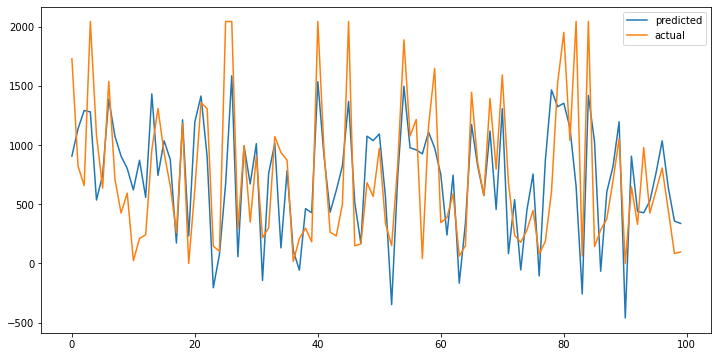

In [112]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [113]:
#printing the r2 and adjusted r2 values
print('R2 score:',r2_score(y_test,y_pred))
print('Adjusted R2 score:',adj_r2(y_test,y_pred))

R2 score: 0.5486462092129352
Adjusted R2 score: 0.544483868779164


In [114]:
#best score from cross validation
scores=cross_val_score(lasso,x_train,y_train,cv=3)
print('cross validation score=',np.mean(scores))

cross validation score= 0.5699258105815194


# Decision tree

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
#defining variable for decision tree regressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

#predicting values from the x_test from the model
y_pred = regressor.predict(x_test)


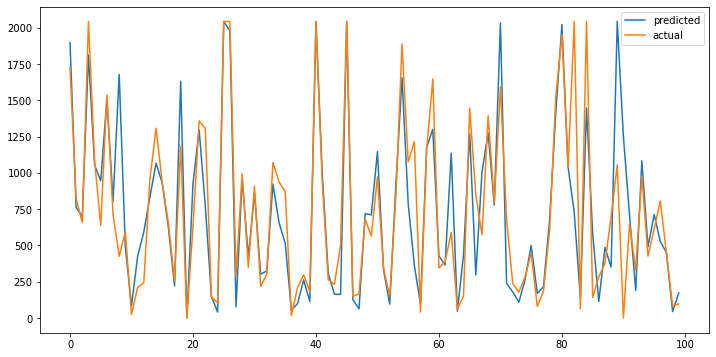

In [117]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [118]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

Rsquare:  0.7232915218990739
adjusted_Rsquare:  0.7207397434266734


In [119]:
regressor.feature_importances_


array([2.72493863e-01, 3.18179891e-01, 1.19829563e-01, 2.15349121e-02,
       2.13156779e-02, 8.72834868e-02, 1.55514262e-02, 4.01299376e-04,
       2.93673533e-02, 1.38218342e-02, 1.19795369e-03, 1.75234041e-06,
       2.81044690e-03, 1.74937565e-03, 8.80274923e-02, 6.43367172e-03])

#  Hyperparameter tuning and cross validation on Decision Tree

In [120]:
#parameters of decision tree ro be considered
param={'max_depth':[3,5,7,9,11],
       'min_samples_split':[10,20,40],
       'min_samples_leaf':[5,10,20,50],
       'max_leaf_nodes':[20,40,80,100]
       }
#finding the best parameters by gridsearchcv
cv_model=GridSearchCV(regressor,param_grid=param,cv=3,verbose=3)

#fitting training dataset to the model
cv_model.fit(x_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.579 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.600 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.575 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.579 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.600 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.575 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.579 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.600 tota

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'max_leaf_nodes': [20, 40, 80, 100],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 20, 40]},
             verbose=3)

In [121]:
#predicting the values
y_pred= cv_model.best_estimator_.predict(x_test)

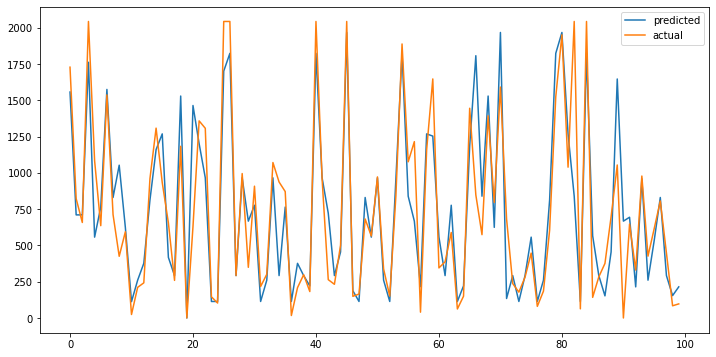

In [122]:
 #plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [123]:
print('R square score=',cv_model.best_score_)

R square score= 0.8068754697893584


In [124]:
print('Best parameters are:',cv_model.best_params_)

Best parameters are: {'max_depth': 11, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [125]:
#finding the best cross validation score
scores=cross_val_score(cv_model,x_train,y_train,cv=3)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.599 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.582 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10;, score=0.562 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.599 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.582 total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=0.562 total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.599 total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=40;, score=0.582 tota

In [126]:
print('cross validation score=',np.mean(scores))

cross validation score= 0.8048835465078854


# Random forest regression

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
#defining a variable for random forest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

#predicting values from the model
y_pred=rf.predict(x_test)

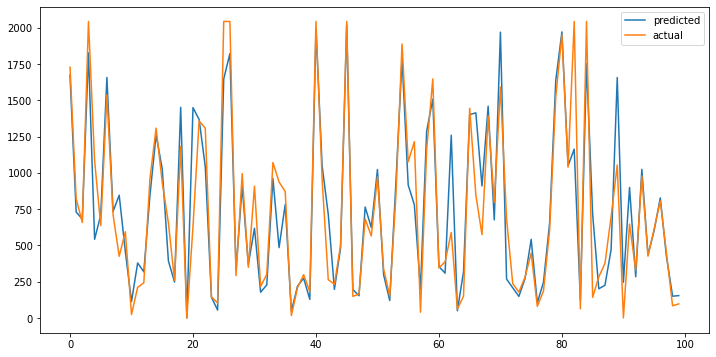

In [129]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [130]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

Rsquare:  0.8339505051506347
adjusted_Rsquare:  0.8324192129791133


# Hyper parameter tuning and Cross validation on Random forest

In [131]:
#parameters of decision tree ro be considered
param={'max_depth':[5,7,9,11],
       'min_samples_split':[10,20,40],
       'min_samples_leaf':[10,20],
       #'max_leaf_nodes':[20,40,80],
       'n_estimators':[100,200,300]
         }
#finding the best parameters by gridsearchcv
cv_model=GridSearchCV(rf,param_grid=param,cv=3,verbose=3)
cv_model.fit(x_train,y_train)         

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.743 total time=   0.7s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.769 total time=   0.7s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.771 total time=   0.7s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.742 total time=   1.5s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.767 total time=   1.5s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.770 total time=   1.4s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, sc

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'max_leaf_nodes': [20, 40, 80],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [132]:
print('R square score=',cv_model.best_score_)
print('Best parameters are:',cv_model.best_params_)

R square score= 0.8375764998624318
Best parameters are: {'max_depth': 11, 'max_leaf_nodes': 80, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [133]:
#best score from cross validation
scores=cross_val_score(cv_model,x_train,y_train,cv=2)
print('cross validation score=',np.mean(scores))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.781 total time=   0.4s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.763 total time=   0.4s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=0.757 total time=   0.4s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.778 total time=   0.9s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.760 total time=   0.9s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=0.756 total time=   0.8s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, sc




# Support Vector Machines

In [154]:
from sklearn.svm import SVR

In [156]:
#defining a variable for random forest
svm= SVR(kernel='rbf')
svm.fit(x_train,y_train)
#predicting values from the modelS
y_pred=svm.predict(x_test)

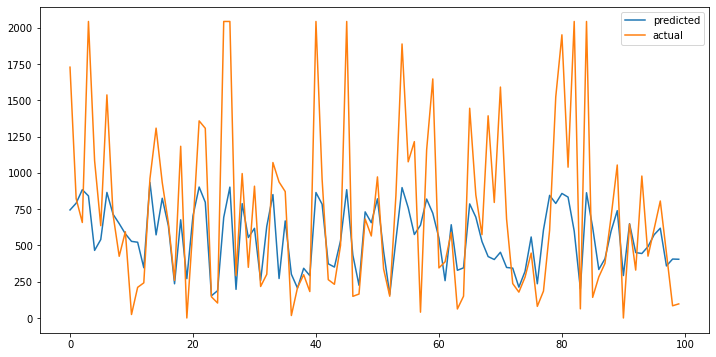

In [157]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [158]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

Rsquare:  -4.110120183804504
adjusted_Rsquare:  -4.1572452114361305


# KNN

In [147]:
from sklearn.neighbors import KNeighborsRegressor

In [148]:
#calling Kneighbors variable and fitting it
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
#predicting values from the train test
y_pred=knn.predict(x_test)

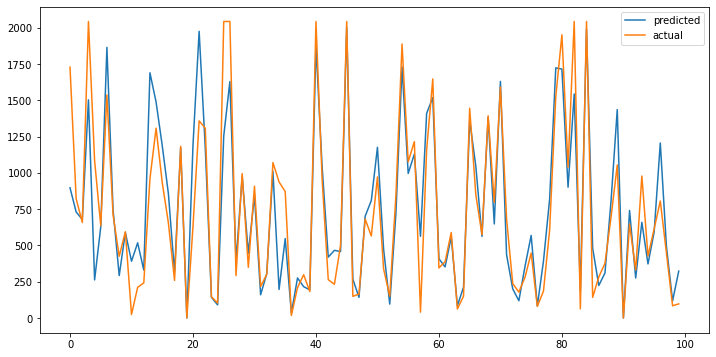

In [149]:
#plotting actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(['predicted','actual'])
plt.show()

In [150]:
print('Rsquare: ',r2_score(y_pred,y_test))
print('adjusted_Rsquare: ',adj_r2(y_pred,y_test))

Rsquare:  0.7131801964611262
adjusted_Rsquare:  0.7105351723362721


# Cross validating and hyperparameter tuning KNN

In [151]:
#getting the best parameters by gridsearchcv and fitting to the model
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn,param_grid=param_dict)
knn_grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 21, 23, 25]})

In [152]:
print('R square score=',knn_grid.best_score_)
print('Best parameters are:',knn_grid.best_params_)

R square score= 0.7730329522987562
Best parameters are: {'n_neighbors': 5}


In [153]:
#best score from cross validation
scores=cross_val_score(knn_grid,x_train,y_train,cv=2)
print('cross validation score=',np.mean(scores))

cross validation score= 0.7462912828232396
